# Skew G-Jensen-Shannon divergence

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

from utils import PlotParams

In [2]:
plotter = PlotParams()
plotter.set_params()
FIG_DIR = os.path.join(os.pardir, 'figs')

In [3]:
def gaussian(x, mu, sig):
    return 1. / (np.sqrt(2. * np.pi) * sig) * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

## One-dimensional normal distribution comparison

### Distributions

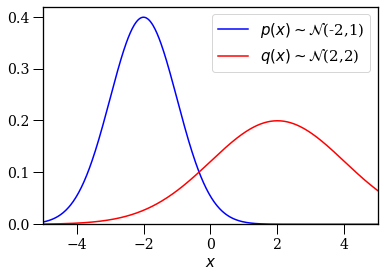

In [4]:
x = np.linspace(-5, 5, 500)

example_num = 1
m_1, s_1 = -2, 1
m_2, s_2 = 2, 2

# example_num = 2
# m_1, s_1 = 0, 0.5
# m_2, s_2 = 0, 3

# example_num = 3
# m_1, s_1 = 2, 1
# m_2, s_2 = -2, 1

# example_num = 4
# m_1, s_1 = -5, 1
# m_2, s_2 = 5, 2

p = gaussian(x, m_1, s_1)
q = gaussian(x, m_2, s_2)

plt.plot(x, p, 'b', label='$p(x)\sim\mathcal{N}$'+f'({m_1},{s_1})')
plt.plot(x, q, 'r', label='$q(x)\sim\mathcal{N}$'+f'({m_2},{s_2})')
plt.xlim(-5, 5), plt.ylim(bottom=0)
plt.xlabel('$x$')
plt.legend()
plt.savefig(os.path.join(FIG_DIR, f'gaussians-1D_{example_num}.pdf'), bbox_inches='tight')

### Kullback-Leibler divergence
* Clearly asymmetric

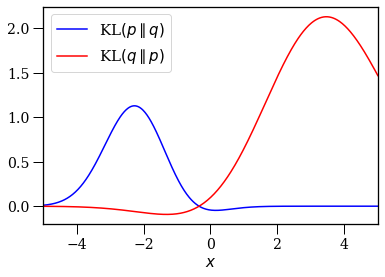

In [5]:
kl_pq = p * np.log(p / q)
plt.plot(x, kl_pq, 'b', label=r'KL$(p\parallel q)$')
kl_qp = q * np.log(q / p)
plt.plot(x, kl_qp, 'r', label=r'KL$(q\parallel p)$')
plt.xlim(-5, 5)
plt.xlabel('$x$')
_ = plt.legend()

### Jensen-Shannon divergence
Jenson-Shannon divergence is the average divergence to the **arithmetic** mean
\begin{align}
    \textrm{JS}(q\parallel p) = \frac{1}{2}\textrm{KL}\left(p\parallel \frac{p+q}{2}\right) + \frac{1}{2}\textrm{KL}\left(q\parallel\frac{p+q}{2}\right).
\end{align}

Text(0.5, 0, '$x$')

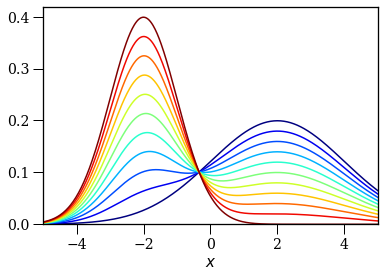

In [6]:
_ = range_ = np.linspace(0, 1, 11)
cmap = cm.jet(range_)
for a, c in zip(range_, cmap):
    m = a * p + (1 - a) * q
    plt.plot(x, m, c=c, label=r'$\alpha=$'+f'{a:.1f}')
plt.xlim(-5, 5), plt.ylim(bottom=0)
plt.xlabel('$x$')

In [7]:
mo = (p + q) / 2

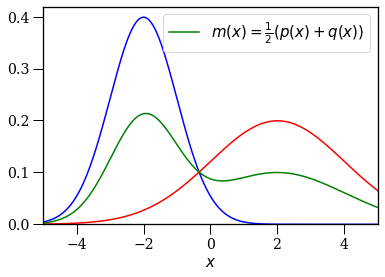

In [8]:
plt.plot(x, p, 'b')
plt.plot(x, q, 'r')
plt.plot(x, mo, 'g', label=r'$m(x)=\frac{1}{2}(p(x)+q(x))$')
plt.xlim(-5, 5), plt.ylim(bottom=0)
plt.xlabel('$x$')
_ = plt.legend()
plt.savefig(os.path.join(FIG_DIR, f'gaussians-1D_JS-0.5.pdf'), bbox_inches='tight')

KL divergence terms to **arithmetic** mean in JS divergence

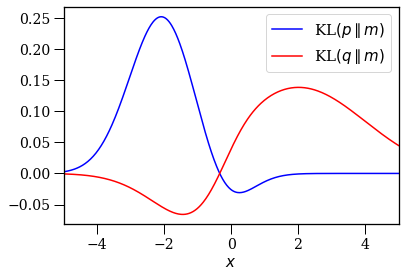

In [9]:
kl_pm = p * np.log(p / mo)
plt.plot(x, kl_pm, 'b', label=r'KL$(p\parallel m)$')
kl_qm = q * np.log(q / mo)
plt.plot(x, kl_qm, 'r', label=r'KL$(q\parallel m)$')
plt.xlim(-5, 5)
plt.xlabel('$x$')
_ = plt.legend()

Final (point-wise) JS divergence

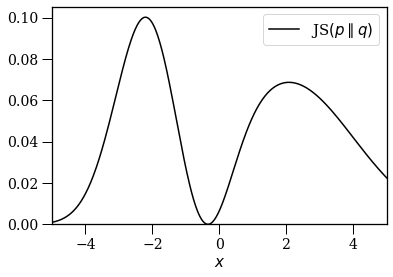

In [10]:
js_pq = (kl_pm + kl_qm) / 2
plt.plot(x, js_pq, 'k', label=r'JS$(p\parallel q)$')
plt.xlim(-5, 5), plt.ylim(bottom=0)
plt.xlabel('$x$')
_ = plt.legend()

## Skew geometric-Jensen-Shannon

In one dimension, the matrix harmonoic barycentre for $\Sigma_{\alpha}$
\begin{align}
    \Sigma_{\alpha} &= \left((1-\alpha)\Sigma_{1}^{-1} + \alpha\Sigma_{2}^{-1}\right)^{-1} \\
    \mu_{\alpha} &= \Sigma_{\alpha}\left((1-\alpha)\Sigma_{1}^{-1}\mu_{1}+\alpha\Sigma_{2}^{-1}\mu_{2}\right),
\end{align}
reduces to a weighted harmonic mean:
\begin{align}
        \sigma_{\alpha}^{2} &= \frac{1}{(1-\alpha)\frac{1}{\sigma_{1}^{2}}+\alpha\frac{1}{\sigma_{2}^{2}}} \\
        \mu_{\alpha}^{2} &= \sigma_{\alpha}^{2} \left((1-\alpha)\frac{\mu_{1}}{\sigma_{1}^{2}}+\alpha\frac{\mu_{2}}{\sigma_{2}^{2}}\right)
\end{align}

In [11]:
def get_s_a(m_1, s_1, m_2, s_2, a=0.5):
    s_a = 1 / ((1 - a) / s_1 + a / s_2)
    m_a = s_a * ((1 - a) * m_1 / s_1 + a * m_2 / s_2)
    
    return m_a, s_a

In [12]:
m_a, s_a = get_s_a(m_1, s_1, m_2, s_2, a=0.5)
m = gaussian(x, m_a, s_a)

Skew geometric-Jenson-Shannon divergence is the weighted average divergence to the **geometric** mean
\begin{align}
    \textrm{JS}(q\parallel p) = (1-\alpha)\textrm{KL}\left(p, G_{\alpha}(p,q)\right) + \alpha\textrm{KL}\left(q, G_{\alpha}(p,q)\right).
\end{align}

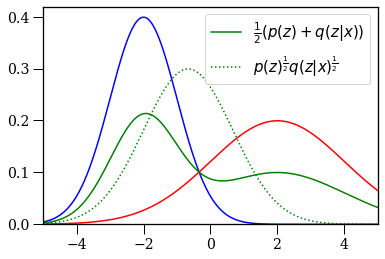

In [14]:
plt.plot(x, p, 'b')
plt.plot(x, q, 'r')
plt.plot(x, mo, 'g', label=r'$\frac{1}{2}(p(z)+q(z|x))$')
plt.plot(x, m, 'g:', label=r'$p(z)^{\frac{1}{2}}q(z|x)^{\frac{1}{2}}$')
plt.xlim(-5, 5), plt.ylim(bottom=0)
_ = plt.legend()
plt.savefig(os.path.join(FIG_DIR, f'gaussians-1D_GJS-0.5.pdf'), bbox_inches='tight')

$\alpha=[0.0,\ldots,1.0]$

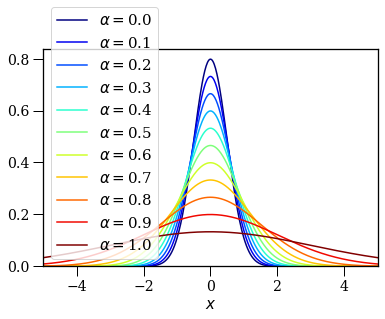

In [14]:
_ = range_ = np.linspace(0, 1, 11)
cmap = cm.jet(range_)
for a, c in zip(range_, cmap):
    m_a, s_a = get_s_a(m_1, s_1, m_2, s_2, a=a)
    m = gaussian(x, m_a, s_a)
    plt.plot(x, m, c=c, label=r'$\alpha=$'+f'{a:.1f}')
plt.xlim(-5, 5), plt.ylim(bottom=0)
plt.xlabel('$x$')
plt.legend()

In [15]:
m_a, s_a = get_s_a(m_1, s_1, m_2, s_2, a=0.5)
m = gaussian(x, m_a, s_a)

KL divergence terms to **geometric** mean in G-JS divergence

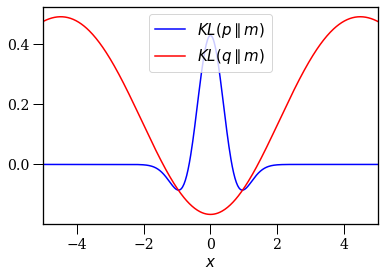

In [16]:
kl_pm = p * np.log(p / m)
plt.plot(x, kl_pm, 'b', label=r'$KL(p\parallel m)$')
kl_qm = q * np.log(q / m)
plt.plot(x, kl_qm, 'r', label=r'$KL(q\parallel m)$')
plt.xlim(-5, 5)
plt.xlabel('$x$')
_ = plt.legend()

Final (point-wise) G-JS divergence

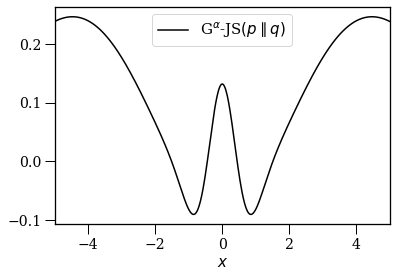

In [17]:
gjs_pq = (kl_pm + kl_qm) / 2
plt.plot(x, gjs_pq, 'k', label=r'G$^{\alpha}$-JS$(p\parallel q)$')
plt.xlim(-5, 5)
plt.xlabel('$x$')
_ = plt.legend()

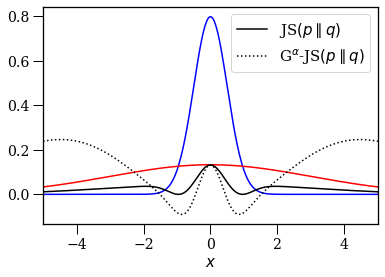

In [18]:
plt.plot(x, p, 'b')
plt.plot(x, q, 'r')
plt.plot(x, js_pq, 'k', label=r'JS$(p\parallel q)$')
plt.plot(x, gjs_pq, 'k:', label=r'G$^{\alpha}$-JS$(p\parallel q)$')
plt.xlim(-5, 5)
plt.xlabel('$x$')
plt.legend()
plt.savefig(os.path.join(FIG_DIR, f'gaussians-divergences-1D_{example_num}.pdf'), bbox_inches='tight')